In [2]:
import random

words = ['PROGRAMMING', 'CEREMONY', 'ENGINEERING', 'ELECTRONIC', 'ARTIFICIAL', 'INTELLIGENCE']

word_to_guess = random.choice(words)

hidden_word = ['_' for _ in word_to_guess]

guessed_letters = []
incorrect_guesses = 0
max_incorrect_guesses = 6

hangman_stages = [
    """
    |
    |
    |
    """,
    """
    |
    |
    |
    O
    """,
    """
    |
    |
    |
    O
     |
    """,
    """
    |
    |
    |
    O
    /|
    """,
    """
    |
    |
    |
    O
    /|\\
    """,
    """
    |
    |
    |
    O
    /|\\
    /
    """,
    """
    |
    |
    |
    O
    /|\\
    / \\
    """
]
# show the incorrect guesses amount and the hangman stage
while incorrect_guesses < max_incorrect_guesses and '_' in hidden_word:
    print(' '.join(hidden_word))
    print("Incorrect guesses:", incorrect_guesses)
    print(hangman_stages[incorrect_guesses])

    # Prompt the user to guess a letter
    guess = input("Guess a letter: ").upper()

    # Check if the letter has already been guessed
    if guess in guessed_letters:
        print("You already guessed that letter.")
        continue

    guessed_letters.append(guess)

    # Check if the guess is correct
    if guess in word_to_guess:
        for index, letter in enumerate(word_to_guess):
            if letter == guess:
                hidden_word[index] = guess
    else:
        incorrect_guesses += 1

# Final game state display
# print(' '.join(hidden_word))
# print("Incorrect guesses:", incorrect_guesses)
# print(hangman_stages[incorrect_guesses])

# Check if the player won or lost
if '_' not in hidden_word:
    print("Congratulations! You've guessed the word:", word_to_guess)
else:
    print("Sorry, you've run out of guesses. The word was:", word_to_guess)

_ _ _ _ _ _ _ _ _ _
Incorrect guesses: 0

    |
    |
    |
    


Guess a letter:  g


_ _ _ _ _ _ _ _ _ _
Incorrect guesses: 1

    |
    |
    |
    O
    


Guess a letter:  A


_ _ _ _ _ _ _ _ _ _
Incorrect guesses: 2

    |
    |
    |
    O
     |
    


Guess a letter:  E


E _ E _ _ _ _ _ _ _
Incorrect guesses: 2

    |
    |
    |
    O
     |
    


Guess a letter:  N


E _ E _ _ _ _ N _ _
Incorrect guesses: 2

    |
    |
    |
    O
     |
    


Guess a letter:  L


E L E _ _ _ _ N _ _
Incorrect guesses: 2

    |
    |
    |
    O
     |
    


Guess a letter:  T


E L E _ T _ _ N _ _
Incorrect guesses: 2

    |
    |
    |
    O
     |
    


Guess a letter:  R


E L E _ T R _ N _ _
Incorrect guesses: 2

    |
    |
    |
    O
     |
    


Guess a letter:  o


E L E _ T R O N _ _
Incorrect guesses: 2

    |
    |
    |
    O
     |
    


Guess a letter:  b


E L E _ T R O N _ _
Incorrect guesses: 3

    |
    |
    |
    O
    /|
    


Guess a letter:  n


You already guessed that letter.
E L E _ T R O N _ _
Incorrect guesses: 3

    |
    |
    |
    O
    /|
    


Guess a letter:  i


E L E _ T R O N I _
Incorrect guesses: 3

    |
    |
    |
    O
    /|
    


Guess a letter:  c


Congratulations! You've guessed the word: ELECTRONIC


In [39]:
#  Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2
#  Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2 Question 2

import pandas as pd

file_path = 'spotify.csv'
spotify = pd.read_csv(file_path)

# Parse the 'track_album_release_date' with 'mixed' format
spotify['year'] = pd.to_datetime(spotify['track_album_release_date'], format='mixed', errors='coerce').dt.year

# Find elements in  year 2017
df_2017 = spotify[spotify['year'] == 2017]

# Group by genre and calculate the average values
avg_values = df_2017.groupby('playlist_genre').agg({
    'loudness': 'mean',
    'mode': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'duration_ms': 'mean'
}).reset_index()



In [38]:
# milliseconds to minutes
avg_values['duration_min'] = avg_values['duration_ms'] / 60000
avg_values.drop(columns=['duration_ms'], inplace=True)

# Save .csv file
output_path = 'spotify_2017_genre_averages.csv'
avg_values.to_csv(output_path, index=False)

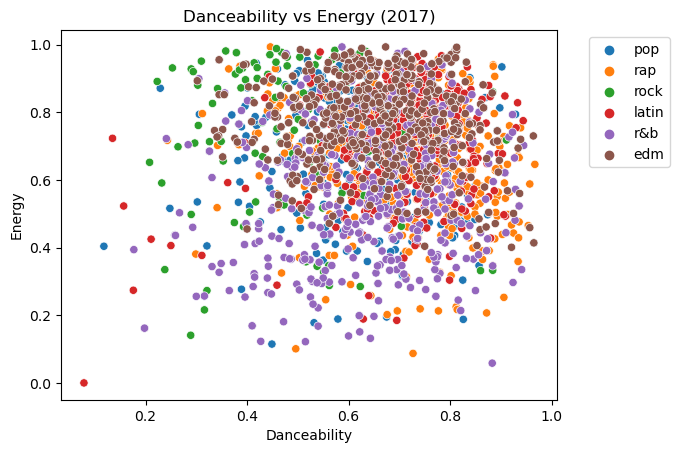

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of danceability vs energy
sns.scatterplot(data=df_2017, x='danceability', y='energy', hue='playlist_genre')
plt.title('Danceability vs Energy (2017)')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [51]:
correlation_matrix = df_2017[['danceability', 'energy', 'loudness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']].corr()
print(correlation_matrix)

# A correlation coefficient of 0.010452
# between danceability and energy suggests that there is a very weak negative linear relationship between these two variables. 
# This value is close to zero, indicating that the relationship is almost nonexistent.

                  danceability    energy  loudness     tempo  speechiness  \
danceability          1.000000 -0.010452  0.116560 -0.117291     0.110303   
energy               -0.010452  1.000000  0.659842  0.134293    -0.028760   
loudness              0.116560  0.659842  1.000000  0.066866    -0.070157   
tempo                -0.117291  0.134293  0.066866  1.000000     0.047153   
speechiness           0.110303 -0.028760 -0.070157  0.047153     1.000000   
acousticness         -0.037544 -0.522022 -0.360102 -0.116194     0.061236   
instrumentalness     -0.008320  0.002907 -0.254731  0.008211    -0.102973   
liveness             -0.125290  0.147445  0.042728  0.011921     0.081841   
valence               0.326287  0.259851  0.241294 -0.056030     0.024943   

                  acousticness  instrumentalness  liveness   valence  
danceability         -0.037544         -0.008320 -0.125290  0.326287  
energy               -0.522022          0.002907  0.147445  0.259851  
loudness        

In [48]:
df_2017.corr(numeric_only=True)

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
track_popularity,1.000000,0.055800,-0.129167,-0.005478,0.016304,0.043163,-0.066193,0.086491,-0.143547,-0.054911,0.059681,-0.054668,-0.037104,NaN
danceability,0.055800,1.000000,-0.010452,-0.026833,0.116560,-0.047514,0.110303,-0.037544,-0.008320,-0.125290,0.326287,-0.117291,-0.107457,NaN
energy,-0.129167,-0.010452,1.000000,-0.018498,0.659842,0.002976,-0.028760,-0.522022,0.002907,0.147445,0.259851,0.134293,0.000749,NaN
key,-0.005478,-0.026833,-0.018498,1.000000,-0.010441,-0.168329,-0.008238,0.085259,0.000547,0.000349,-0.002774,-0.044434,0.004144,NaN
loudness,0.016304,0.116560,0.659842,-0.010441,1.000000,-0.006570,-0.070157,-0.360102,-0.254731,0.042728,0.241294,0.066866,-0.087256,NaN
mode,0.043163,-0.047514,0.002976,-0.168329,-0.006570,1.000000,-0.047717,-0.010271,0.015436,0.009268,-0.039883,0.010116,0.029816,NaN
speechiness,-0.066193,0.110303,-0.028760,-0.008238,-0.070157,-0.047717,1.000000,0.061236,-0.102973,0.081841,0.024943,0.047153,-0.102177,NaN
acousticness,0.086491,-0.037544,-0.522022,0.085259,-0.360102,-0.010271,0.061236,1.000000,-0.033802,-0.069520,0.000565,-0.116194,-0.098235,NaN
instrumentalness,-0.143547,-0.008320,0.002907,0.000547,-0.254731,0.015436,-0.102973,-0.033802,1.000000,-0.018437,-0.152950,0.008211,0.169470,NaN
liveness,-0.054911,-0.125290,0.147445,0.000349,0.042728,0.009268,0.081841,-0.069520,-0.018437,1.000000,-0.016873,0.011921,0.016135,NaN


      product_category           product_type  total_order
0               Bakery               Biscotti         5788
1               Bakery                 Pastry         6961
2               Bakery                  Scone        10465
3              Branded               Clothing          221
4              Branded             Housewares          555
5               Coffee       Barista Espresso        24943
6               Coffee            Drip coffee        12891
7               Coffee  Gourmet brewed coffee        25973
8               Coffee  Organic brewed coffee        13012
9               Coffee  Premium brewed coffee        12431
10        Coffee beans         Espresso Beans          319
11        Coffee beans          Gourmet Beans          366
12        Coffee beans            Green beans          134
13        Coffee beans      House blend Beans          183
14        Coffee beans          Organic Beans          420
15        Coffee beans          Premium Beans          4

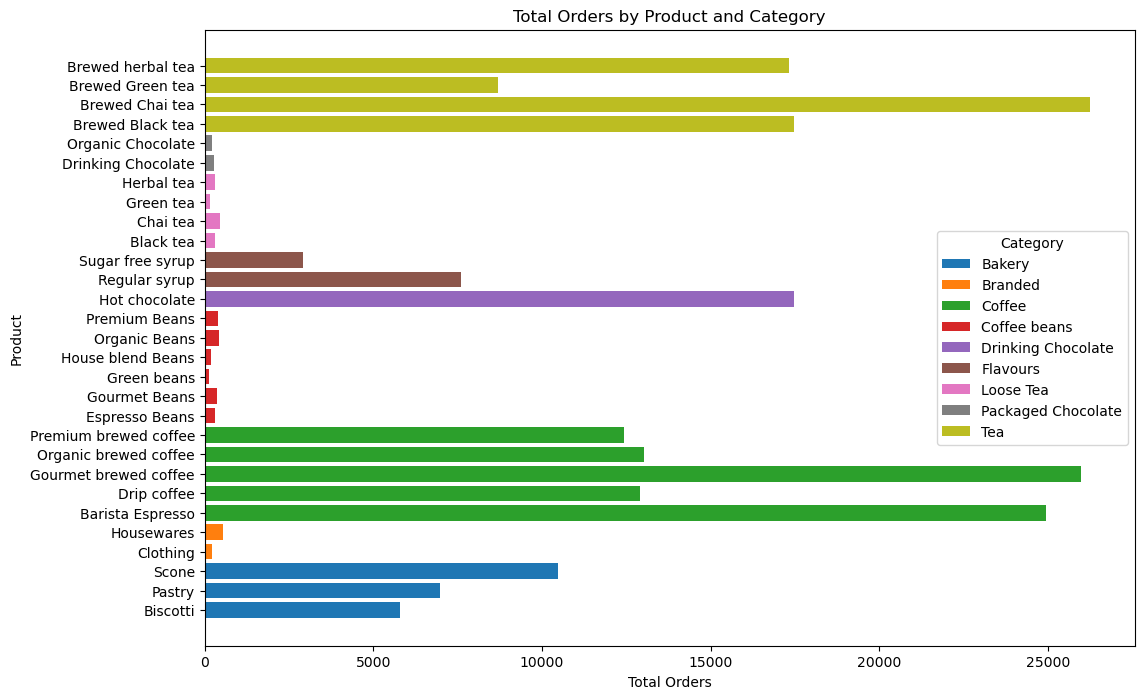

In [30]:
# Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3
# Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 Question 3 
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
coffee = pd.read_csv('coffee.csv')

# Step 2: Calculate the total order for each product type
total_orders = coffee.groupby(['product_category', 'product_type']).agg({
    'transaction_qty': 'sum'
}).reset_index()

total_orders.rename(columns={'transaction_qty': 'total_order'}, inplace=True)

# Total Orders
print(total_orders)

#show plot 
plt.figure(figsize=(12, 8))
for category in total_orders['product_category'].unique():
    subset = total_orders[total_orders['product_category'] == category]
    plt.barh(subset['product_type'], subset['total_order'], label=category)

plt.xlabel('Total Orders')
plt.ylabel('Product')
plt.title('Total Orders by Product and Category')
plt.legend(title='Category')
plt.show()